In [5]:
import os
os.chdir('/home/jovyan/work/src')
import do_calibration
import importlib
importlib.reload(do_calibration)


<module 'do_calibration' from '/home/jovyan/work/src/do_calibration.py'>

In [9]:
import gzip

basedir = './inputfiles/testing/converted_fits/'
count=0
result = {}
for filename in os.listdir(basedir):
    if count < 10:
        count=count+1
        with open(basedir+filename, 'rb') as f_in:
            length = len(gzip.compress(f_in.read()))
            result[filename] = length
            print(length)
            
sorted_by_value = sorted(result.items(), key=lambda kv: kv[1], reverse=True)
print(sorted_by_value)

2320601
2284083
2241479
1353554
1233366
1223501
1374003
2241231
2273350
2322380
[('kout000009.fts', 2322380), ('kout000008.fts', 2320601), ('kout000034.fts', 2284083), ('kout000035.fts', 2273350), ('kout000020.fts', 2241479), ('kout000021.fts', 2241231), ('kout000038.png', 1374003), ('kout000039.png', 1353554), ('kout000011.png', 1233366), ('kout000010.png', 1223501)]


In [3]:
import fits2bitmap


In [4]:
basedir = './inputfiles/testing/converted_fits/'
fits2bitmap.fits2bitmap(basedir+'kout000021.fts', scale='log')


ValueError: Format 'fts' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

In [5]:
import glob
the_dir = glob.glob(basedir+'*.fts')
the_dir.sort()
#print(the_dir)
#index = the_dir.index('kout000069.fts')
indices = [i for i, elem in enumerate(the_dir) if 'kout000069.fts' in elem]
print(indices)

[62]


In [6]:
import pandas as pd

basedir = './inputfiles/testing/results/lightcurves/'
files = glob.glob(basedir+'*.txt')
#print(files)
result = {}
for file in files:
    df = pd.read_csv(file, skiprows=[1], sep=' ')
    length = len(df.index)
    df = df[df['V-C'] < 99]
    filterlength = len(df.index)
    #print (filterlength/length)
    result[file] = [filterlength, length]
#df.head()   
#print(result)

In [7]:
for key in result:
    if result[key][1] != 93:
        print(key, result[key][1])

./inputfiles/testing/results/lightcurves/curve_08812.txt 92
./inputfiles/testing/results/lightcurves/curve_03001.txt 92


10000 10000
converted values


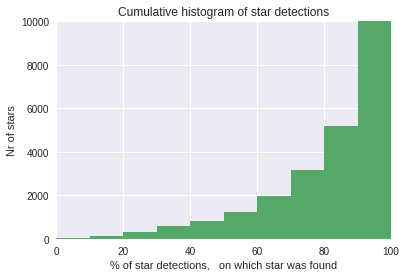

In [44]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

keys = result.keys()
values = list(map(lambda x: x[0]/x[1]*100, result.values()))
print(len(keys), len(values))
print('converted values')
colors = list("rgbcmyk")
sigma = 15 
num_bins = 50
mu = 100  # mean of distribution

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(values, num_bins, density=1)

# add a 'best fit' line
#y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
#     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
#ax.plot(bins, range(1,50), '--')
ax.set_xlabel('% of star detections,   on which star was found')
ax.set_ylabel('Nr of stars')
ax.set_title(r'Cumulative histogram of star detections')
ax.grid(True)
#plt.xticks(np.arange(0, 110, step=10))
major_ticks = np.arange(0, 11000, 2000)
minor_ticks = np.arange(0, 11000, 1000)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
plt.minorticks_on()
plt.xlim(0,100)
plt.ylim(0,10000)
#plt.yticks(np.arange(0, 11000, step=1000))
# Tweak spacing to prevent clipping of ylabel
#fig.tight_layout()
plt.hist(bins=10, x=values, cumulative=1)
plt.show()






In [45]:
fig.savefig('cumul_histo_detections.png')



In [122]:
import pandas as pd
import numpy as np
import os
os.chdir('/home/jovyan/work')
import sys
import init
import struct
from collections import namedtuple
import do_photometry
import matplotlib
import matplotlib.pyplot as plt

import importlib
importlib.reload(do_photometry)


%matplotlib inline
plt.style.use('seaborn')
pd.options.mode.chained_assignment = None
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
stddevs, collect, apertures, fwhm = do_photometry.main()

0 ./current/matched_photometry/match000065.pht
Date from header: 2457238.665011574
1 ./current/matched_photometry/match000074.pht
Date from header: 2457238.6979282405
2 ./current/matched_photometry/match000091.pht
Date from header: 2457238.7604050925
3 ./current/matched_photometry/match000087.pht
Date from header: 2457238.7456712965
4 ./current/matched_photometry/match000002.pht
Date from header: 2457236.687951389
5 ./current/matched_photometry/match000076.pht
Date from header: 2457238.7052777777
6 ./current/matched_photometry/match000071.pht
Date from header: 2457238.68693287
7 ./current/matched_photometry/match000079.pht
Date from header: 2457238.7163078706
8 ./current/matched_photometry/match000004.pht
Date from header: 2457236.694953704
Nr of stars for aperture 2: 10000
Mb used: 16.4794921875
Entry for First aperture, first star: [[  1.76412157e+01   1.32658958e-01]
 [  1.64103711e+01   4.99662161e-02]
 [  1.05086390e+01   9.26852226e-04]
 [  1.58724100e+01   3.15424800e-02]
 [  1.

Calculating aperture using the daophot FWHM trick (http://www.mso.anu.edu.au/~jerjen/daophot.html)

In [141]:
stddevs.shape
print(fwhm, apertures)
median = np.median(np.add(np.take(fwhm, 1, axis=1), np.take(fwhm, 2, axis=1)))
print(median)
apertureidx = np.abs(apertures - median).argmin()
apertures[apertureidx]

[[ 3.          2.28783729  0.63264661]
 [ 3.          2.15013107  0.55522412]
 [ 3.          2.30184593  0.70085257]
 [ 3.          2.231127    0.61483809]
 [ 3.          2.12644366  0.54690271]
 [ 3.          2.30270797  0.66515957]
 [ 3.          2.22791556  0.60204049]
 [ 3.          2.26280816  0.62869959]
 [ 3.          2.23782441  0.62523245]] (2.0, 2.73, 3.82, 5.27, 7.09, 9.27, 11.82, 14.73, 18.0, 21.64, 25.64, 30.0)
2.86305685699


2.73

In [145]:
minstdev = np.argmin(stddevs[apertureidx], axis=0)
print(stddevs[apertureidx][20:30])

[ 8.07599213  7.94124478  8.77179126  6.41070855  6.55755265  7.99529924
  8.04397651  7.42436746  6.61338003  7.48394928]


Get the sorted indices of the stddevs array

In [113]:
sorted = np.argsort(stddevs, axis=1)
print("First 10 stdevs:", stddevs[2][:10]) # print the first ten stdevs for aperture 2
print("After sorting:", stddevs[2][sorted[2]][:10])
print("Indices of first 10:", sorted[2][:10])
print("Sorted shape", sorted.shape)

First 10 stdevs: [ 7.58103629  7.51508744  6.8347559   6.88465172  6.86567889  7.83426818
  7.24437166  7.36583168  7.33178553         inf]
After sorting: [ 6.35067433  6.40320983  6.49114998  6.56923676  6.60065941  6.61855825
  6.65379407  6.79663206  6.8347559   6.86567889]
Indices of first 10: [ 23 186  24  13 105  28  79 103   2   4]
Sorted shape (12, 10000)


Get an aperture_x_top2stars array with real star refs

In [114]:
#print(collect[0,0])
compstars = np.empty([len(collect), 2, len(collect[0][0])], dtype=float)
for idx, entry in enumerate(collect):
    compstars[idx][0] = np.take(entry[sorted[idx][0]], 0, axis=1)
    print("errors for idx", idx, np.take(entry[sorted[idx][0]], 1, axis=1))
    compstars[idx][1] = np.take(entry[sorted[idx][1]], 0, axis=1)
print("Printing aperture 0 of compstars:", compstars[0])
print("Printing aperture 8 of compstars:", compstars[9])

errors for idx 0 [ 0.00258881  0.00318956  0.00297433  0.0027377   0.00261956  0.02225548
  0.00314212  0.00330848  0.0027464 ]
errors for idx 1 [ 0.00245792  0.00311184  0.00282621  0.00263423  0.00257564  0.02373302
  0.00302947  0.00319213  0.00262958]
errors for idx 2 [ 0.00256711  0.00336993  0.0029816   0.00282526  0.00281358  0.02935767
  0.00323725  0.00344515  0.00281441]
errors for idx 3 [ 0.00193906  0.00194508  0.00229126  0.00214314  0.00206089  0.0385676
  0.00190884  0.002042    0.06980437]
errors for idx 4 [ 0.00228232  0.00229871  0.00278032  0.00258583  0.00247866  0.00683767
  0.00224137  0.00243729  0.01091009]
errors for idx 5 [ 0.00278741  0.0028165   0.00348854  0.00322008  0.00308126  0.0029875
  0.00273341  0.00301433  0.0041787 ]
errors for idx 6 [ 0.00102788  0.0019899   0.00103486  0.00114101  0.00125688  0.00157976
  0.00169611  0.00165188  0.00118232]
errors for idx 7 [ 0.00114197  0.00136083  0.00122684  0.00133932  0.00149     0.00126565
  0.00130105  0.

Subtract the mags of those two stars from each other and calculate the stdev

In [115]:
subtractstd = np.empty(len(collect))
for idx, entry in enumerate(compstars):
    subtractstd[idx] = np.subtract(entry[0], entry[1]).std()
print(subtractstd)

[ 1.83581324  1.83280803  1.83571961  1.30176727  1.69986771  1.21707783
  0.41465502  0.05598075  0.90408689  0.01195658  0.01173647  0.01173647]


Select the aperture with the lowest stdev

(2.0, 2.73, 3.82, 5.27, 7.09, 9.27, 11.82, 14.73, 18.0, 21.64, 25.64, 30.0)


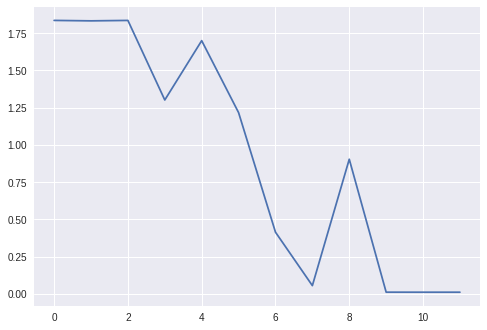

In [116]:
fig, ax = plt.subplots()
print(apertures)
plt.plot(subtractstd)
# plt.scatter(range(len(compstars[0])), compstars[0])
plt.show()

In [37]:

test = np.random.rand(3, 3)
subject = test
# print(stddevs)
# print(stddevs[1,0].min())
sorted = np.argsort(subject, axis=1)
print(subject)
print(sorted)
print("applied", test[0][sorted[0]])

[[ 0.11607264  0.04600264  0.0407288 ]
 [ 0.85546058  0.70365786  0.47417383]
 [ 0.09783416  0.49161588  0.47347177]]
[[2 1 0]
 [2 1 0]
 [0 2 1]]
applied [ 0.0407288   0.04600264  0.11607264]


In [12]:
stddevs[2][:50]

array([  4.76166477e+00,   4.65413553e+00,   5.01064970e+00,
         4.14607846e+00,   5.27808387e+00,   5.09696797e+00,
         4.18080412e+00,   5.16307689e+00,   4.71254001e+00,
         4.68153759e+00,   5.10091282e+00,   4.34130026e+00,
         4.47970076e+00,   5.16044259e+00,   4.23204906e+00,
         4.76652468e+00,   4.89256446e+00,   4.57134776e+00,
         5.46522519e+00,   5.48039085e+00,   5.44964247e+00,
         5.00499378e+00,   5.89811436e+00,   4.63121171e+00,
         5.06875464e+00,   5.18935299e+00,   5.34454165e+00,
                    inf,   4.61428254e+00,   4.85134004e+00,
         5.50101120e+00,   5.27145273e+00,   5.51334879e+00,
         4.64270392e+00,   5.43526628e+00,   4.92881403e+00,
         6.19589909e+00,              inf,   5.54538510e+00,
         4.75619464e+00,   5.38821814e+00,   4.83009401e+00,
         4.56410654e+00,   4.29658142e+00,   4.91905661e+08,
         5.05702071e+00,   5.43582504e+00,   5.16073960e+00,
         5.71211771e+00,

In [14]:
def get_fixed_compstars(star_descriptions=None):
    if star_descriptions is None:
        star_descriptions = do_calibration.get_star_descriptions(init.star_list)
    result = []
    star_catalog = do_calibration.create_star_descriptions_catalog(star_descriptions)
    for ucac_id in init.comparison_stars:
        df = do_calibration.get_ucac4_id(ucac_id)
        star_id = do_calibration.get_starid_for_radec(df['RAJ2000'], df['DEJ2000'], star_catalog)
        logging.debug(f"Using fixed compstar '{ucac_id}' with Vmag: '{df['Vmag']}' and star id: {star_id}")
        result.append((star_id, df))
    return result

In [15]:
os.chdir('/home/jovyan/work/src')
import init
import logging
os.chdir('/home/jovyan/work')
result = get_fixed_compstars()

Reading star descriptions for: range(1, 10001) with size 10000
Creating star_descriptions star catalog with 10000 stars...
Creating astropy Catalog with 10000 objects...
Creating astropy Catalog with 1 objects...
Creating astropy Catalog with 1 objects...


In [16]:
result

[(99,
              UCAC4     RAJ2000    DEJ2000  ePos   f.mag  of  db  pmRA  pmDE  \
  29  b'231-154752'  271.234735 -43.845816    19  12.033   0   0  -2.1  -3.8   
  
        Jmag  ...    imag  H  A  b  h  Z  B  L  N  S  
  29  11.103  ...  12.003  0  1  0  0  0  0  0  0  1  
  
  [1 rows x 24 columns]),
 (126,
              UCAC4     RAJ2000    DEJ2000  ePos   f.mag  of  db  pmRA  pmDE  \
  30  b'232-147677'  271.280782 -43.777292    22  12.347   0   0   0.6   4.5   
  
        Jmag  ...    imag  H  A  b  h  Z  B  L  N  S  
  30  11.512  ...  12.227  0  7  0  0  0  0  0  0  1  
  
  [1 rows x 24 columns])]

In [46]:
vmag = result[0][1]
vmag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 29 to 29
Data columns (total 24 columns):
UCAC4      1 non-null object
RAJ2000    1 non-null float64
DEJ2000    1 non-null float64
ePos       1 non-null int16
f.mag      1 non-null float32
of         1 non-null uint8
db         1 non-null int16
pmRA       1 non-null float64
pmDE       1 non-null float64
Jmag       1 non-null float32
Kmag       1 non-null float32
Bmag       1 non-null float32
Vmag       1 non-null float32
rmag       1 non-null float32
imag       1 non-null float32
H          1 non-null uint8
A          1 non-null uint8
b          1 non-null uint8
h          1 non-null uint8
Z          1 non-null uint8
B          1 non-null uint8
L          1 non-null uint8
N          1 non-null uint8
S          1 non-null uint8
dtypes: float32(7), float64(4), int16(2), object(1), uint8(10)
memory usage: 170.0+ bytes


In [37]:
vmag.iloc(0)[0]

12.107

In [6]:
listy = do_calibration.get_random_star_descriptions()

In [12]:
ltwo = filter(lambda x: x.local_id % 2 ==0, listy)
ltwolist = list(ltwo)
ltwolist[0].local_id = 999
print(listy)

[StarDescription(999,None,<SkyCoord (ICRS): (ra, dec) in deg
    ( 0.,  0.)>,None,[]), StarDescription(1,None,<SkyCoord (ICRS): (ra, dec) in deg
    ( 1.,  1.)>,None,[]), StarDescription(2,None,<SkyCoord (ICRS): (ra, dec) in deg
    ( 2.,  2.)>,None,[]), StarDescription(3,None,<SkyCoord (ICRS): (ra, dec) in deg
    ( 3.,  3.)>,None,[]), StarDescription(4,None,<SkyCoord (ICRS): (ra, dec) in deg
    ( 4.,  4.)>,None,[]), StarDescription(5,None,<SkyCoord (ICRS): (ra, dec) in deg
    ( 5.,  5.)>,None,[]), StarDescription(6,None,<SkyCoord (ICRS): (ra, dec) in deg
    ( 6.,  6.)>,None,[]), StarDescription(7,None,<SkyCoord (ICRS): (ra, dec) in deg
    ( 7.,  7.)>,None,[]), StarDescription(8,None,<SkyCoord (ICRS): (ra, dec) in deg
    ( 8.,  8.)>,None,[]), StarDescription(9,None,<SkyCoord (ICRS): (ra, dec) in deg
    ( 9.,  9.)>,None,[])]
